# 1.
![6 1](https://user-images.githubusercontent.com/26344632/40294729-618484e0-5d09-11e8-9094-8ecffd9ce4d9.png)

## （1）画出x与y的散点图，初步判断x与y的关系

In [18]:
import seaborn as sns
import matplotlib
import pandas as pd
from numpy import *
from sklearn import metrics

In [6]:
data = {'x':[5.1,3.5,7.1,6.2,8.8,7.8,4.5,5.6,8.0,6.4],
       "y":[1907,1287,2700,2373,3260,3000,1947,2273,3113,2493]}
data = pd.DataFrame(data)
data

,x,y
0,5.1,1907
1,3.5,1287
2,7.1,2700
3,6.2,2373
4,8.8,3260
5,7.8,3000
6,4.5,1947
7,5.6,2273
8,8.0,3113
9,6.4,2493


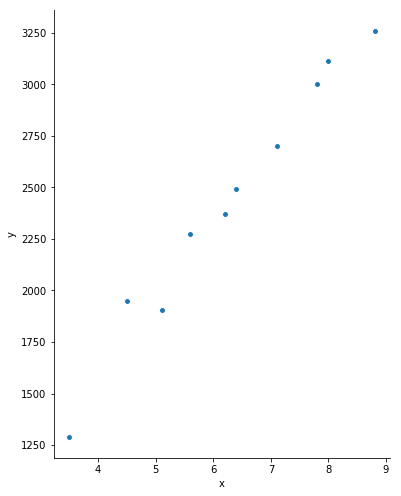

In [7]:
%matplotlib inline
sns.pairplot(data, x_vars='x', y_vars='y', size=7, aspect=0.8)

## （2）求出Y关于X的一元线性方程

In [8]:
x = data['x'].reshape(-1,1) #-1 == all
y = data['y'].reshape(-1, 1)
x

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


array([[5.1],
       [3.5],
       [7.1],
       [6.2],
       [8.8],
       [7.8],
       [4.5],
       [5.6],
       [8. ],
       [6.4]])

In [9]:
# def standRegres(xArr,yArr):
#     xMat = mat(xArr); yMat = mat(yArr).T
#     xTx = xMat.T*xMat
#     if linalg.det(xTx) == 0.0:
#         print ("This matrix is singular, cannot do inverse")
#         return
#     ws = xTx.I * (xMat.T*yMat)
#     return ws

# standRegres(x,y)

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(x,y)

print (linreg.intercept_)
print (linreg.coef_)

[140.95363128]
[[364.18196329]]


### Y关于X的一元线性方程

$y = 364.18196329x+140.95363128$

## （3）若今年的X=7，估计Y的值

In [11]:
X_test = pd.DataFrame({'x':[7]})["x"].reshape(-1,1)
X_test

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[7]], dtype=int64)

In [12]:
X_test = array([[7]])
X_test

array([[7]])

In [13]:
y_pred = linreg.predict(X_test)
y_pred

array([[2690.2273743]])

# 2. 

![6 2](https://user-images.githubusercontent.com/26344632/40294730-62081cba-5d09-11e8-86de-c2b8459c1d97.png)

求出关于Y的多元线性模型，并尝试删除某一变量后，与全变量的线性回归方程进行比较，找出最优模型

In [14]:
data = {'x1':[0.4,0.4,3.1,0.6,4.7,1.7,9.4,10.1,11.6,12.6,10.9,23.1,23.1,21.6,23.1,1.9,26.8,29.9],
        'x2':[52,23,19,34,24,65,44,31,29,25,37,46,50,44,56,36,58,51],
        'x3':[158,163,37,157,59,123,46,117,173,112,111,114,134,73,168,143,202,124],
        "y":[64,60,71,61,54,77,81,93,93,51,76,96,77,93,95,54,168,99]}
data = pd.DataFrame(data)
data.head()

,x1,x2,x3,y
0,0.4,52,158,64
1,0.4,23,163,60
2,3.1,19,37,71
3,0.6,34,157,61
4,4.7,24,59,54


In [20]:
#2
import pandas as pd
import numpy as np

data = pd.DataFrame({'x1':[0.4,0.4,3.1,0.6,4.7,1.7,9.4,10.1,11.6,12.6,10.9,23.1,23.1,21.6,23.1,1.9,26.8,29.9],
 'x2':[52,23,19,34,24,65,44,31,29,58,37,46,50,44,56,36,58,51],
 'x3':[158,163,37,157,59,123,46,117,173,112,111,114,134,73,168,143,202,124],
 'y':[64,60,71,61,54,77,81,93,93,51,76,96,77,93,95,54,168,99]})   

#加入所有自变量
linreg = LinearRegression()
linreg.fit(data[['x1','x2','x3']],data['y'])  
y_pred = linreg.predict(data[['x1','x2','x3']])  
print (linreg.intercept_)
print (linreg.coef_)

print ("MAE:",metrics.mean_absolute_error(data['y'],y_pred))
print ("MSE:",metrics.mean_squared_error(data['y'],y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(data['y'],y_pred)))
     
data.corr()

43.650072446518664
[ 1.78533861 -0.08329137  0.16102189]
MAE: 13.328007676045038
MSE: 310.2077586074669
RMSE: 17.61271582145885


,x1,x2,x3,y
x1,1.000000,0.468022,0.151964,0.693403
x2,0.468022,1.000000,0.315242,0.358414
x3,0.151964,0.315242,1.000000,0.361685
y,0.693403,0.358414,0.361685,1.000000


## 剔除x1变量建立模型

In [26]:
##模型比较
feature_cols = ['x2', 'x3']

X = data[feature_cols]
y = data.y

##测试集和训练集的构建
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print (linreg.intercept_)
print (linreg.coef_)

print ("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
     

1.536702862365587
[0.48371701 0.44497481]
MAE: 30.888170060232778
MSE: 1110.6362415286244
RMSE: 33.32620952836707


## 剔除x2变量建立模型

In [27]:
##模型比较
feature_cols = ['x1', 'x3']

X = data[feature_cols]
y = data.y

##测试集和训练集的构建
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print (linreg.intercept_)
print (linreg.coef_)

print ("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
     

5.134145686059995
[1.81681094 0.40949419]
MAE: 26.8351076237799
MSE: 901.3111436948706
RMSE: 30.02184444192046


## 剔除x3变量建立模型

In [28]:
##模型比较
feature_cols = ['x1', 'x2']

X = data[feature_cols]
y = data.y

##测试集和训练集的构建
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print (linreg.intercept_)
print (linreg.coef_)

print ("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
     

50.98963961830084
[1.91625793 0.17481953]
MAE: 7.0177139230369106
MSE: 58.70035005206942
RMSE: 7.661615368319492


## 结论：剔除x3变量的效果最佳。